In [178]:
import string
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn import tree
from xgboost import XGBRegressor
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import *

from xgboost import *






In [179]:
df = pd.read_csv("student_data - Copy(in).csv", encoding='latin-1')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GPA
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1.133333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1.066667
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1.666667
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,2.933333
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1.733333


In [180]:

df['sex'] = df['sex'].map({'F':0, 'M':1})
df['school'] = df['school'].map({'GP':1, 'MS':0})
df['address'] = df['address'].map({'R':1, 'U':0})
df['internet'] = df['internet'].map({'yes':1, 'no':0})
df['famsup'] = df['famsup'].map({'yes':1, 'no':0})
df['activities'] = df['activities'].map({'yes':1, 'no':0})
df['schoolsup'] = df['schoolsup'].map({'yes':1, 'no':0})
df['higher'] = df['higher'].map({'yes':1, 'no':0})
df['romantic'] = df['romantic'].map({'yes':1, 'no':0})
df['paid'] = df['paid'].map({'yes':1, 'no':0})
df['nursery'] = df['nursery'].map({'yes':1, 'no':0})
df['famsize'] = df['famsize'].map({'GT3':1, 'LE3':0})
df['Mjob'] = df['Mjob'].map({'at_home':2, 'other':1,'health':3,'services':4,'teacher':5})
df['Fjob'] = df['Fjob'].map({'at_home':2, 'other':1,'health':3,'services':4,'teacher':5})
df['reason'] = df['reason'].map({'course':2,'home':1,'other':3,'reputation':4})
df['guardian'] = df['guardian'].map({'father':1,'mother':2,'other':3})
df['Pstatus'] = df['Pstatus'].map({'A':1, 'T':0})
df = df.drop(['address','sex'], axis=1)
df = pd.get_dummies(df, columns=['school','famsize','Pstatus','Medu','Fedu',
                                'Mjob','Fjob','reason','guardian','schoolsup','famsup','paid',
                                'activities','nursery','higher','internet','romantic'])
df.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,activities_0,activities_1,nursery_0,nursery_1,higher_0,higher_1,internet_0,internet_1,romantic_0,romantic_1
0,18,2,2,0,4,3,4,1,1,3,...,True,False,False,True,False,True,True,False,True,False
1,17,1,2,0,5,3,3,1,1,3,...,True,False,True,False,False,True,False,True,True,False
2,15,1,2,3,4,3,2,2,3,3,...,True,False,False,True,False,True,False,True,True,False
3,15,1,3,0,3,2,2,1,1,5,...,False,True,False,True,False,True,False,True,False,True
4,16,1,2,0,4,3,2,1,2,5,...,True,False,False,True,False,True,True,False,True,False


In [181]:
df.columns
#df.drop(['G1','G2','G3'],axis=1)
df.drop(['GPA','G2','G3'],axis=1)


,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,activities_0,activities_1,nursery_0,nursery_1,higher_0,higher_1,internet_0,internet_1,romantic_0,romantic_1
0,18,2,2,0,4,3,4,1,1,3,...,True,False,False,True,False,True,True,False,True,False
1,17,1,2,0,5,3,3,1,1,3,...,True,False,True,False,False,True,False,True,True,False
2,15,1,2,3,4,3,2,2,3,3,...,True,False,False,True,False,True,False,True,True,False
3,15,1,3,0,3,2,2,1,1,5,...,False,True,False,True,False,True,False,True,False,True
4,16,1,2,0,4,3,2,1,2,5,...,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,1,2,2,5,5,4,4,5,4,...,True,False,False,True,False,True,True,False,True,False
391,17,2,1,0,2,4,5,3,4,2,...,True,False,True,False,False,True,False,True,True,False
392,21,1,1,3,5,5,3,3,3,3,...,True,False,True,False,False,True,True,False,True,False
393,18,3,1,0,4,4,1,3,4,5,...,True,False,True,False,False,True,False,True,True,False


MSE : 2.369309277551061e-17


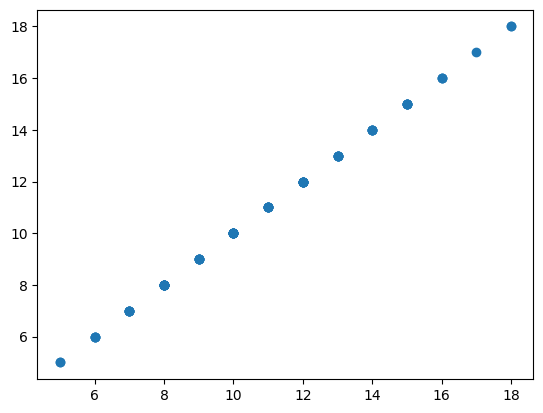

In [182]:
y = df['G1']
X = df.drop(['G1'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model1 = LinearRegression()
model1.fit(X_train, y_train) 
y_hat = model1.predict(X_test)
print('MSE :' , mean_squared_error(y_test, y_hat))
plt.scatter(y_test, y_hat)
